<a href="https://www.kaggle.com/code/abdulmelikhmeda/inventory-purchase-sales-analysis-and-optimization?scriptVersionId=177852221" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<h1 align="center"; style="color:tomato; font-weight:bold; font-family:Adobe Garamond Pro;"> ✨`Inventory, Purchase, and Sales Analysis and Optimization: A Comprehensive Data Analysis Project`✨ </h1>

**Project Summary**

This project aims to enhance inventory management practices for Bibitor, LLC, a retail wine and spirits company operating across multiple locations. WBibitor, LLC manages sales and cost of goods sold that reach into the hundreds of millions, rendering traditional spreadsheets insufficient. The vast volume of data, which includes millions of sales, purchase, and inventory records, requires a sophisticated approach for effective analysis. the goal of this project is to leverage extensive data analysis to optimize inventory control and extract valuable insights from the company's operation, particularly sales and purchases.The project tasks are divided into two main objectives:

- Analyze the inventory management process and provide recommendations for optimization.
- Extract meaningful business insights from the data and provide actionable recommendations.

Project Tasks Overview:

**`Part I: Explatonary Data Analysis, Cleaning and Preprocessing`**
The company provided six business operation datasets for the year ending 2016. The dataset includes:

- Beginning inventory for 2016
- Ending inventory for 2016
- Purchase invoices for 2016
- Purchase Price
- Sales data

Given the volume of data, there may be instances where the data is messy and inconsistent. It needs to be explored, cleaned, assessed, with key trends and inconsistencies identified. In this part, we:

- `Explore the data`: Load the data and get an overview. Identify any irregularities.
- `Clean and Preprocess the data`
  - `Identify and handle missing values and duplicates`
  - `Standardize or remove inconsistencies and erroneous entries`
  - `Identify outliers or anomalous data`
  - `Merge related tables for easier handling and processing`

`Part II and Part III ---> EXplanotory Data Analysis and Visualization`

**`Part II: Inventory Analysis and Optimization`**

- Conduct an Inventory Control Analysis based on parameters such as Lead Time (LT), Safety Stock, Reorder Point, and ABC Analysis.
- Extract meaningful business insights related to inventory by answering the following questions:

  1.  Which products have high inventory counts at the end of the inventory period, and do they fall into Class A in ABC inventory analysis?
  2.  Which products have low inventory counts at the end of the inventory period, did they register any sales in the previous year, and do they fall into Class C in ABC inventory analysis?
  3.  Identify products with large inventories but low annual sales, and conversely, use the ratio of annual sales to ending inventory for this analysis.
  4.  Do products with larger safety stocks record higher sales volumes, and to which category in ABC Analysis do they belong?
  5.  List the top 10 products that require immediate reordering along with their reorder quantities.
  6.  Determine each category's contribution to total revenue based on the ABC inventory analysis.
  7.  Identify the top 10 products from each category that contribute most to the annual total revenue.
  8.  Identify the top 10 products from each category that contribute least to the annual total revenue.

**`Part III: Extracting Meaningfull insight for Purchase and Sales`**

Extract meaningful business insights related to purchase and sales by answering the following questions:
- Who are the the important vendors or supplier. Evaluate based on quantities of items supplied, values of the items and contirbution of the items to total revenue of the company. bottom vendors interms of quantity and value of supplies
- Who are the the least important vendors or supplier. Evaluate based on quantities of items supplied, values of the items and contirbution of the items to total revenue of the company. bottom vendors interms of quantity and value of supplies
- What is the average payment execution period for each vendor and how does it correlate with the purchase quantity or purchase value?
- Which products sell the most in terms of quantity and dollar sales amount, and conversely, which ones sell the least?
- How does the sales performance of different stores compare, and which are the top 10 stores with the highest sales output?
- Which product size sells the most?
- Can we project and identify the sales trends throughout the year?

**Conclusion:**  
The insights derived from these analyses will provide recommendations for managing inventory and other business operation in a more efficient and sustainable manner.

## **`Part I:  Data Exploratory and Cleaning`**
# **<font color = "tab:blue">Part I:  Data Exploratory and Cleaning</font>**
# **<font color = "#1f77b4">Part I:  Data Exploratory and Cleaning</font>**

### `1.1 Importing Libraries and Frameworks`


In [1]:
# import libraries
import numpy as np
import pandas as pd
import re
import random
import warnings
warnings.filterwarnings("ignore") # Turn off warnings 
print('Pandas version i am using:', pd.__version__)

Pandas version i am using: 2.2.1


In [2]:
# Visualization and other setups
import matplotlib.pyplot as plt # 
import seaborn as sns
import matplotlib_inline.backend_inline
from matplotlib.dates import DateFormatter
matplotlib_inline.backend_inline.set_matplotlib_formats("svg")

#Set plot style
def set_default_style():
    plt.style.use(['ggplot'])
    plt.rc('axes', edgecolor='w', titlesize=12, titleweight='bold', labelsize=11, labelcolor='tab:blue', 
           labelweight='bold', grid=False)
    plt.rc('text', color='tomato')
    plt.rc('xtick', labelsize=10, color='tab:blue')
    plt.rc('ytick', labelsize=10, color='tab:blue') 
    plt.rc('figure', figsize=(10, 4), dpi=150)
set_default_style()

#set max display for convinience
pd.set_option('display.max_columns', 100) 
pd.set_option('display.width', 200) 

### `1.2 Load/import the datasets`


In [3]:
#Identify datasets directory
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/inventory-analysis-case-study/InvoicePurchases12312016.csv
/kaggle/input/inventory-analysis-case-study/EndInvFINAL12312016.csv
/kaggle/input/inventory-analysis-case-study/SalesFINAL12312016.csv
/kaggle/input/inventory-analysis-case-study/BegInvFINAL12312016.csv
/kaggle/input/inventory-analysis-case-study/2017PurchasePricesDec.csv
/kaggle/input/inventory-analysis-case-study/PurchasesFINAL12312016.csv


In [4]:
# Load all the datesets
beginning_inventory = pd.read_csv('/kaggle/input/inventory-analysis-case-study/BegInvFINAL12312016.csv')
ending_inventory = pd.read_csv('/kaggle/input/inventory-analysis-case-study/EndInvFINAL12312016.csv')
purchases = pd.read_csv('/kaggle/input/inventory-analysis-case-study/PurchasesFINAL12312016.csv')
purchase_prices = pd.read_csv('/kaggle/input/inventory-analysis-case-study/2017PurchasePricesDec.csv')
purchase_invoices = pd.read_csv('/kaggle/input/inventory-analysis-case-study/InvoicePurchases12312016.csv')
sales = pd.read_csv('/kaggle/input/inventory-analysis-case-study/SalesFINAL12312016.csv')

### `1.3 Exploratory  Data Analysis`

Here we do Exploratory Data Analysis for all our datasets. Develop an overview that includes key details about the datasets, such as data types, structure, and summary statistics. This comprehensive view will help identify errors, inconsistencies, or patterns, aiding in further data cleaning and preprocessing.


In [5]:
#Explore the datasets
def explore_dataset(dataframe):
    summary = []
    for column in dataframe.columns:
        data_type = dataframe[column].dtype
        total_count = len(dataframe[column])
        unique_count = dataframe[column].nunique()
        unique_sample = dataframe[column].unique()[0:10]
        missing_values = dataframe[column].isnull().sum()
        summary.append({'Column': column, 'Data Type': data_type, 'total count': total_count,
                        'Unique Count': unique_count, 'Unique Sample': unique_sample, 
                        'Missing Values': missing_values})
    return pd.DataFrame(summary)

## Explore all dataset in one go-- make sure IDE displays maximum output with side scrolling. 
datasets = [("Beginning Inventory", beginning_inventory),
            ("Ending Inventory", ending_inventory),
            ("Purchase", purchases),
            ("Purchase Invoices", purchase_invoices),
            ("Purchase Price", purchase_prices),
            ("Sales", sales)]

for index, (dataset_name, dataset) in enumerate(datasets, start=1):
    print(f"{index}. Explore {dataset_name} dataset key details:")
    print(explore_dataset(dataset))
    print("\n")

1. Explore Beginning Inventory dataset key details:
        Column Data Type  total count  Unique Count                                      Unique Sample  Missing Values
0  InventoryId    object       206529        206529  [1_HARDERSFIELD_58, 1_HARDERSFIELD_60, 1_HARDE...               0
1        Store     int64       206529            79                    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]               0
2         City    object       206529            67  [HARDERSFIELD, ASHBORNE, HORNSEY, EANVERNESS, ...               0
3        Brand     int64       206529          8094         [58, 60, 62, 63, 72, 75, 77, 79, 115, 120]               0
4  Description    object       206529          7291  [Gekkeikan Black & Gold Sake, Canadian Club 18...               0
5         Size    object       206529            41  L, Liter, 1.75L, 50mL, 375mL, 50mL 4 Pk, ...               0
6       onHand     int64       206529           474                  [8, 7, 6, 3, 18, 2, 5, 11, 17, 0]               0
7

Data exploration aids in identifying irregularities that need cleaning and preprocessing:

- The InventoryId in both beginning_inventory and ending_inventory have equal unique counts as the total counts. This suggests they could serve as primary and foreign keys for joining the two tables. Despite having identical attributes (except for inventory columns), the IDs may not match. Other datasets lack a specific primary key, as the total count differs from unique count numbers. Therefore, caution is necessary when joining tables.
- Some tables contain `missing values` that need identification and proper handling.
- Size columns in all tables show `inconsistencies` due to varying units of measurement. Examples include 750mL, Liter, 750mL + 2/,2 Pk, 50mL 4 Pk, 750mL 3 Pk. These need conversion into a single, consistent unit of measurement.
- `Size` and `Volume` columns carry duplicate data and one of them can be dropped.
- The `date format` differs across tables. For instance, the sales table uses d/m/yyyy, while others use yyyy/mm/dd.
- Some columns contain `trailing and ending spaces between entries`, as seen in the VendorName column of the purchase table (e.g., ALTAMAR BRANDS LLC ,).


### `1.4 Data Cleaning and Preprocessing`


#### a. `Identify dataset and corrosponding columns with missing values and duplicates`


In [6]:
#identity missing values and duplicates
def check_missing_and_duplicates(*datasets):
    for dataset_name, dataset in datasets:
        missing_values_count = {}
        duplicates_count = {}
          
        # Check missing values amd duplicates
        for column_name in dataset.columns:
            missing_count = dataset[column_name].isnull().sum()
            if missing_count > 0:
                missing_values_count[column_name] = missing_count
        
        duplicates = dataset[dataset.duplicated()]
        duplicates_count["total"] = len(duplicates)
        
          # Print summary
        print(f"Missing values and duplicates summary for {dataset_name}:")
        if len(missing_values_count) == 0:
            print("No missing values in this dataset.")
        else:
            print("Missing Values:")
            for column_name, count in missing_values_count.items():
                print(f" - Column: {column_name}, Missing Values Count: {count}")
        
        if duplicates_count["total"] == 0:
            print("No duplicates in this dataset.")
        else:
            print("Duplicates:")
            print(f" - Total duplicates: {duplicates_count['total']}")  
        print()  # Add newline between each dataset summary

check_missing_and_duplicates(("Beginning Inventory Table", beginning_inventory),
                              ("Ending Inventory Table", ending_inventory),
                              ("Purchases Table", purchases),
                              ("Purchases Invoice Table", purchase_invoices),
                              ("Purchase Price Table", purchase_prices),
                              ("Sales Table", sales))

Missing values and duplicates summary for Beginning Inventory Table:
No missing values in this dataset.
No duplicates in this dataset.

Missing values and duplicates summary for Ending Inventory Table:
Missing Values:
 - Column: City, Missing Values Count: 1284
No duplicates in this dataset.

Missing values and duplicates summary for Purchases Table:
Missing Values:
 - Column: Size, Missing Values Count: 3
No duplicates in this dataset.

Missing values and duplicates summary for Purchases Invoice Table:
Missing Values:
 - Column: Approval, Missing Values Count: 5169
No duplicates in this dataset.

Missing values and duplicates summary for Purchase Price Table:
Missing Values:
 - Column: Description, Missing Values Count: 1
 - Column: Size, Missing Values Count: 1
 - Column: Volume, Missing Values Count: 1
No duplicates in this dataset.

Missing values and duplicates summary for Sales Table:
No missing values in this dataset.
No duplicates in this dataset.



#### **`b. Handling Missing Values`**

The beginning inventory and sales tables do not have any missing values, so the focus will be on the other four tables.

`Handling Missing Values in Ending Inventory of Column "City"`: Out of a total of 224,489 entries, there are 1,284 missing values in the City column. Upon examining the other 66 unique city names and their corresponding store locations, all cities are named except for the city linked to store location 46. Therefore, it's reasonable to assign it the name `TYWARDREATH`, which corresponds to its store number.

`Handling Missing Values in Purchase Table's "Size" Column`: There are only a few missing values out of a total of 2,372,474 entries. We can either drop these rows or fill them with the subsequent non-missing values. Let's opt for the latter.

`Handling Missing Values in the "Approval" Column of the Purchase Invoice Table`: 5,169 out of a total 5,543 records are missing values, making up 93% of the total. This could indicate that they are either not approved or pending approval. Given the high percentage of missing values, this column may not be significant and could be dropped.

`Handling Missing Values in the Purchase Price Table`: There are single missing values in the Description, Size, and Volume columns. We'll drop the Description column row with missing value due to the near identical count of unique and total entries, we cannnot interpolate, and user other fiilling methods. We will also drop the Volume column, as it merely duplicates the Size column. The missing values in the Size column can be handled using 'ffill', assuming that items of the same size are sold concurrently. However, as the missing values in the size and description columns appear in the same row, dropping the row with the missing description will automatically handle the missing value in the size column.

Need confirmation--> run the following code
```py
Missing_Values_rows = purchase_prices[purchase_prices.isnull().any(axis=1)]
print("rows with missing value in Purchase table:\\\\n", Missing_Values_rows)
```

Purchase Price Size column also has four entries with unknown values. Hence we will drop those rows.

`Before preprocessing the DataFrame, we need to make a copy of the DataFrame for reference.`: Data cleaning and manipulation will be done on the copied data frame.

```

```


In [7]:
#Creat a copy of Origninal DataFrames for reference and shorten the df name for simplicity
beg_inv_f = beginning_inventory.copy() 
end_inv_f = ending_inventory.copy()
purchases_f = purchases.copy()
purch_invo_f= purchase_invoices.copy()
purch_pric_f = purchase_prices.copy()
sales_f = sales.copy()

#Handling Missing Values in Ending Inventory of Column "City"
end_inv_f["City"] = end_inv_f["City"].fillna("TYWARDREATH")

#Handling Missing Values in Purchase table of Column "Size"
purchases_f["Size"] = purchases_f["Size"].ffill()

#Handling Missing Values in the "Approval" Column of the Purchase Invoice Table
purch_invo_f = purch_invo_f.drop(['Approval'], axis=1)

#Handling Missing  Values in the Purchase Price Table
purch_pric_f.dropna(subset=["Description"], inplace=True)
purch_pric_f = purch_pric_f[purch_pric_f["Size"] != "Unknown"]

#Handling redudant column in the Purchase price and Sales table  --> size and volum.
purch_pric_f = purch_pric_f.drop(["Volume"], axis=1)
sales_f = sales_f.drop(["Volume"], axis = 1)

print("\n Summary of missing values")  # newline between outputs
#Get a summary of missing values for each table
def check_missing_values(*datasets):
    for dataset_name, dataset in datasets:
        missing_values_count = {}
        for idx, column_name in enumerate(dataset.columns):
            missing_count =dataset[column_name].isnull().sum()
            if missing_count > 0:
                missing_values_count[column_name] = missing_count
        
        if len(missing_values_count) == 0:
            print(f"Missing values count in {dataset_name} = {len(missing_values_count)}")
        else:
            for column_name, count in missing_values_count.items():
                print(f"Column: {column_name}, Missing Values Count: {count}")
       
check_missing_values(("Beginning Inventory Final", beg_inv_f),
                     ("Ending Inventory Final", end_inv_f),
                     ("Purchases Table", purchases_f),
                     ("Purchases Invoice Table", purch_invo_f),
                     ("Purchase Price Table", purch_pric_f),
                     ("Sales Table", sales_f))


 Summary of missing values
Missing values count in Beginning Inventory Final = 0
Missing values count in Ending Inventory Final = 0
Missing values count in Purchases Table = 0
Missing values count in Purchases Invoice Table = 0
Missing values count in Purchase Price Table = 0
Missing values count in Sales Table = 0


#### **`c. Handling duplicatess`**

We don't have duplicates row in any of the datasets as per the above summary output.


#### `d. Handling Irregularities in Data Entries.`


`Handling Size Input Irregularities`: The unit of measurement for the size column in all datasets (five in total) varies, except for the purchase_price dataset. The size information, which represents volume, is input in various formats, including liter, milliliter, oz, pack (pk), and combinations thereof. Therefore, we need to convert these measurements into a unified standard—liter. We will check the unique counts. For those with only one count and no pattern, we will assign an equivalent rate. For others with multiple counts and a pattern, we will convert according to the patterns.


In [8]:
# Get a unique count of each size entry in all datasets and observe the pattern.
data_frames = [beg_inv_f, end_inv_f, purchases_f, purch_pric_f, sales_f]
all_sizes = pd.concat([df["Size"] for df in data_frames])
unique_sizes = all_sizes.unique()
size_counts = {}
for size in unique_sizes:
    size_counts[size] = all_sizes[all_sizes == size].count()
unique_sizes_with_counts = pd.DataFrame({
    'Size': unique_sizes,
    'Total Count': [size_counts[size] for size in unique_sizes]})
print(unique_sizes_with_counts)

        Size  Total Count
0      750mL      2113365
1      Liter        73920
2      1.75L       809721
3       50mL       195549
4      375mL       139094
..       ...          ...
70     560mL            2
71    3750mL            1
72  750mL  3            1
73    1500ml           11
74    9000mL            1

[75 rows x 2 columns]


From the unique counts output, we can observe that there are 75 different ways of expressing size (volume) measurements..

- There are three unique counts with only one count each - 3/100ml, 5/2, and gallons. We will replace these with equivalent conversion rates.
- Other unique counts exhibit patterns. We can use regular expressions to iterate through them and apply conversion rates. These can be grouped into three patterns:
  - Examples include 750ml, 750mL, 750ml + 3/, 750 4p, 750 4pk, etc.
  - Patterns such as Liter, L, or l
  - Sizes expressed in Oz.

We will create a function to apply these conversions to all the datasets.


In [9]:
# Hand the irregulatities of size in all datasets(datasets) 
def convert_to_liters(size):
    size = str(size).lower()
    # Convert 3/100ml and 5/2 -->  
    if "3/100ml" in size: return round(3 * 0.01, 2)  #3/100ml--> 3 packs of 100ml 
    elif '5/2 oz' in size: return round(10 * 0.0295735, 2)  #5/2 oz --> 5 packs of 1/2
    
    #covert Gallon to liter
    elif 'gal' in size:
        gal_value = float(re.search(r'\d+\.*\d*', size).group())
        return round(gal_value * 3.786, 2)   
    
    #handle pattern such as 750ml, 750mL, 750ml + 3/, 750 4p, 750  4pk, etc
    elif 'ml' in size:
        if 'p' in size:
            ml_value, pack_value = re.search(r'(\d+\.*\d*)\s*m*l*\s*(\d*)\s*p*/*P*k*/*', size).groups()
            ml_value = float(ml_value)
            pack_value = float(pack_value) if pack_value else 1
            return round(ml_value * pack_value / 1000, 2)  # p or pk means pack--> multiply
        elif '+' in size:
            ml_value, pack_value = map(float, re.findall(r'\d+\.*\d*', size))
            return round((ml_value + (pack_value * 50)) / 1000, 2)  
        else:
            ml_value = float(re.search(r'\d+\.*\d*', size).group())
            return round(ml_value / 1000, 2)  
    
    # convert Liter or L or l
    elif 'liter' in size or 'l' in size:
        if size == 'liter' or size == 'l': return 1.00
        else:
            liter_value = float(re.search(r'\d+\.*\d*', size).group())
            return round(liter_value, 2)  
    
    #ounces to liters    
    elif 'oz' in size:
        oz_value = float(re.search(r'\d+\.*\d*', size).group())
        return round(oz_value * 0.0295735, 2) 
    else:
        return None

datasets = [beg_inv_f, end_inv_f, purchases_f, purch_pric_f, sales_f]

# Apply the conversion function to each dataframe
for i, dataset in enumerate(datasets):
    dataset['Size'] = dataset['Size'].apply(convert_to_liters)
    datasets[i] = dataset

# Print the converted datasets
for i, dataset in enumerate(datasets):
    print(f"DataFrame {i+1}:")
    print(dataset)
    print()

DataFrame 1:
               InventoryId  Store          City  Brand                   Description  Size  onHand   Price   startDate
0        1_HARDERSFIELD_58      1  HARDERSFIELD     58   Gekkeikan Black & Gold Sake  0.75       8   12.99  2016-01-01
1        1_HARDERSFIELD_60      1  HARDERSFIELD     60        Canadian Club 1858 VAP  0.75       7   10.99  2016-01-01
2        1_HARDERSFIELD_62      1  HARDERSFIELD     62      Herradura Silver Tequila  0.75       6   36.99  2016-01-01
3        1_HARDERSFIELD_63      1  HARDERSFIELD     63    Herradura Reposado Tequila  0.75       3   38.99  2016-01-01
4        1_HARDERSFIELD_72      1  HARDERSFIELD     72          No. 3 London Dry Gin  0.75       6   34.99  2016-01-01
...                    ...    ...           ...    ...                           ...   ...     ...     ...         ...
206524  79_BALLYMENA_46985     79     BALLYMENA  46985  Rodney Strong Cab Svgn Alexa  0.75      13   22.99  2016-01-01
206525  79_BALLYMENA_47014     79  

In [10]:
# Remove trailing and ending spaces in the specified columns.
def remove_spaces(df, *columns):
    for col in columns:
        df[col] = df[col].str.strip()
    return df
beg_inv_f = remove_spaces(beg_inv_f, "City", "Description")
end_inv_f = remove_spaces(end_inv_f, "City", "Description")
purchases_f= remove_spaces(purchases_f, "Description", "VendorName")
purch_invo_ = remove_spaces(purch_invo_f, "VendorName")
purch_pric_f = remove_spaces(purch_pric_f, "Description", "VendorName")
sales_f = remove_spaces(sales_f, "Description", "VendorName")

# Rename 'vendorNo' to 'VendorNumber' in the sales dataset to maintain uniformity across al datasets.
sales_f.rename(columns={'VendorNo': 'VendorNumber'}, inplace=True) 

`Standardize the time format of the specified column in a DataFrame:` The date columns in the Beginning and Ending Inventory datasets are already in date format, so we do not need to format them. We will format the rest.


In [11]:
#Standardize the time format of the specified column in a DataFrame
def format_time(df, *columns):
    for col in columns:
        df[col] =  pd.to_datetime(df[col])
    return df
purchases_f=format_time(purchases_f, "PODate", "ReceivingDate", "InvoiceDate", "PayDate")
purch_invo_f = format_time(purch_invo_f,"InvoiceDate", "PODate", "PayDate")
sales_f = format_time(sales_f, "SalesDate")

## **`Part II: Inventory Analysis and Optimization`**


In this section, we will analyze fundamental inventory management parameters and extract additional insights from the data.

`Analysis of Main Inventory Management Parameters`

- **Lead Time (LT)**
- **Safety Stock (SS)**
- **Reorder Point (RoP)**
- **ABC Analysis**

**`Other Inventory-Related Business Insights`**


### `2.1 Analysis of main inventory management parameters`


#### 2.1.1 **`Lead Time`**:

This refers to the duration between when a warehouse places an order with a supplier and when the goods are received. It's a significant measure for improving inventory management and supply chain processes.
$$
\text{Lead\_Time} = \text{Purchase\_Receiving\_Date} - \text{Purchase\_Order\_Date}
$$



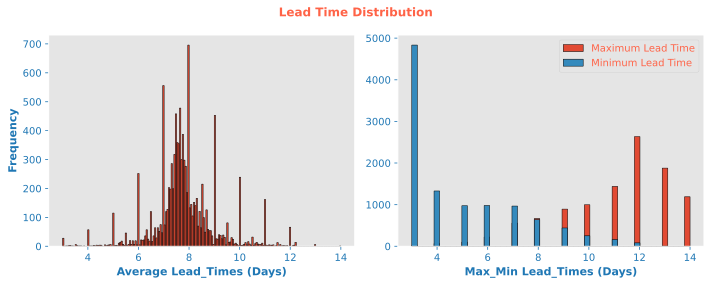

In [12]:
# Calculate lead_time in days and to the dataset
purchases_f['Lead_Time'] = (purchases_f['ReceivingDate'] - purchases_f['PODate']).dt.days

# Group by Brand and Description and calculate lead time summary statistics
LT_summary = purchases_f.groupby(['Brand', 'Description']).agg(
    Max_LT_inDays=('Lead_Time', 'max'), 
    Min_LT_inDays=('Lead_Time', 'min'), 
    Avg_LT_inDays=('Lead_Time', 'mean')).round(2).reset_index()

# Plot the distribution of Average and maximum lead times
fig, axes = plt.subplots(1, 2)
fig.suptitle("Lead Time Distribution", color = 'tomato', weight = 'bold', fontsize=12) 
axes[0].hist(LT_summary["Avg_LT_inDays"], bins=200, density=False, edgecolor="k", label="Average Lead Time")
axes[0].set_xlabel("Average Lead_Times (Days)") 
axes[0].set_ylabel("Frequency")

axes[1].hist(LT_summary["Max_LT_inDays"], bins=50, density=False, edgecolor="k", label="Maximum Lead Time")
axes[1].hist(LT_summary["Min_LT_inDays"], bins=50, density=False, edgecolor="k", label="Minimum Lead Time")
axes[1].set_xlabel("Max_Min Lead_Times (Days)") 
axes[1].legend()

fig.tight_layout()
plt.show()

The histogram illustrates the distribution of average lead times for the products. Most products have an average lead time of roughly 7 or 8 days, as shown by the normal distribution. Thus, most vendors deliver the products within a week. However, some items have shorter lead times of about one to three days, while others have longer lead times of approximately two weeks. The maximum lead time distribution confirms that the average maximum lead time is 12 days. The minimum lead time distribution is skewed to the left, with two days being the most common.


#### 2.1.2 **`Safety stock and Onhand Inventory`**

`Safety Stock(ss)` measures the amount of reserve inventory needs to be stored in the facility. we will determine the optimal Safety Stock based on the sales quantity and the amount of safety stock need to run the sales smooth.
\begin{equation}
\text{Optimizal Safety Stock} = (maximum_lead_time - average lead time) \times average_daily_sales_of_the_product.
\end{equation}

\begin{equation}
\text{Maximum Safety Stock}= (Maximum_daily_sales \times maximum_lead_time) – (average_daily_sales \times average_lead_time_days
\end{equation}


Safety stock summary--> random sample: 
       Brand                   Description  Max_Sales_Qty  Tot_SalesQty  Avg_Sales/Day  Max_LT_inDays  Avg_LT_inDays  Optimal_SS  Max_SS
5696  25789                 Ch Pitot Brdx              3            31           0.53             12           7.89         3.0     3.0
2116   6356           Taylor Cream Sherry             12           526           8.92             14           7.82        56.0    56.0
4404  20862    W Hill Est Cab Svgn No Cst             17           911          15.44             13           7.42        87.0    87.0
3733  17486  Barefoot Cellars Red Moscato              3             4           0.07             12           7.67         1.0     1.0
4752  22418             Pizzolato Moscato              3             4           0.07             11           8.75         1.0     1.0


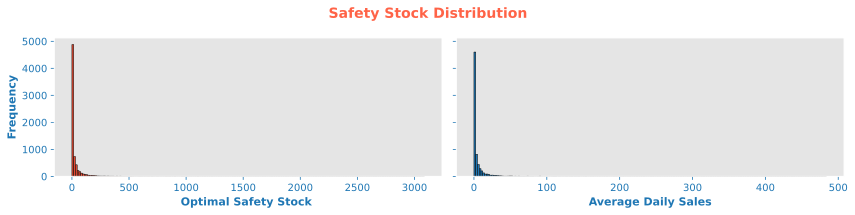

In [13]:
# #Prepare Sales Summary data.
sales_f_summary = sales_f.groupby(['Brand', 'Description']).agg(
                        Max_Sales_Qty=("SalesQuantity", 'max'),
                        Min_Sales_Qty=("SalesQuantity", 'min'),
                        Tot_SalesQty=('SalesQuantity', 'sum')).reset_index()

# Calculating Sales per day for each product grouped by Brand
total_sales_days = (sales_f['SalesDate'].max() - sales_f['SalesDate'].min()).days
sales_f_summary['Avg_Sales/Day'] = (sales_f_summary['Tot_SalesQty'] / total_sales_days).round(2)

#merge the lead time and sales data-->Safety stock data
ss_data = pd.merge(sales_f_summary, LT_summary, on = ["Brand", "Description"])

#Calculate optimal and max safety stock needed, round up to the next whole number
ss_data["Optimal_SS"] = np.ceil((ss_data["Max_LT_inDays"] - ss_data["Avg_LT_inDays"]) * 
                                ss_data["Avg_Sales/Day"]).round(0)

ss_data["Max_SS"] = np.ceil((ss_data["Max_LT_inDays"] - ss_data["Avg_LT_inDays"]) * 
                            ss_data["Avg_Sales/Day"]).round(0)

#Safety Stock Data summary-selected from sales_f_summary and LT_summary
ss_data_summary = ss_data[["Brand", "Description", "Max_Sales_Qty", "Tot_SalesQty", "Avg_Sales/Day", 
                           "Max_LT_inDays","Avg_LT_inDays", "Optimal_SS","Max_SS"]]
print("Safety stock summary--> random sample: \n", ss_data_summary.sample(5, random_state=random.seed()))

# plot optimal safety stock distribution and compare it to average daily sales.
fig, axes = plt.subplots(1, 2, figsize=(12, 3), sharey=True)
fig.suptitle("Safety Stock Distribution", color ='tomato', weight='bold', fontsize=14) 
axes[0].hist(ss_data_summary["Optimal_SS"], bins=200, density = False, 
             edgecolor='k', label="Optimal Safety Stock")
axes[0].set_xlabel("Optimal Safety Stock ")
axes[0].set_ylabel("Frequency")

axes[1].hist(ss_data_summary["Avg_Sales/Day"], bins=200, density = False, 
             color="tab:blue", edgecolor='k', label="Average Sales/Day")
axes[1].set_xlabel("Average Daily Sales")
plt.tight_layout()  
plt.show()


This histogram depicts the count of required safety stock for each brand along with its average daily sales. However, because the data is heavily skewed to the left, the distribution of data points on the right side isn't clearly visible. To resolve this, we use a boxplot.


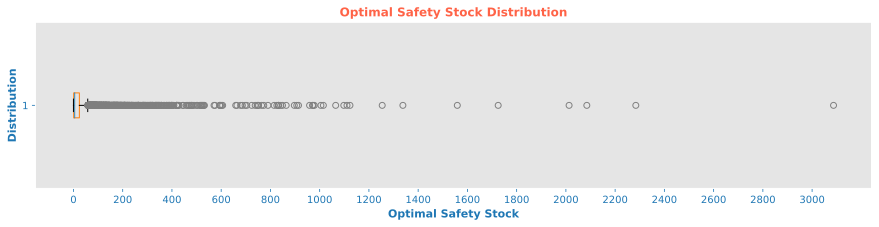

In [14]:
fig, ax = plt.subplots(figsize=(15, 3))
ax.boxplot(ss_data_summary['Optimal_SS'], vert=False, boxprops=dict(color='tab:orange'),  
                            flierprops=dict(markeredgecolor='tab:gray'))
ax.set_xticks(range(0, int(ss_data_summary["Optimal_SS"].max()) + 1, 200)) 
ax.set_title('Optimal Safety Stock Distribution')
ax.set_xlabel('Optimal Safety Stock')
ax.set_ylabel('Distribution')
plt.show()

Most products require a safety stock between zero and 50. However, the boxplot shows that some products need as much as 3500 in safety stocks. The company should maintain the required safety stock to ensure smooth sales and prevent stock shortages. Products with larger safety stock should ideally be those with the highest sales volume or longer lead times. We will explore this further later.

**`Evaluate onhand inventory`**: We will consider the latest ending inventory level as onhand inventory and evaluate safety stock accordingly.


Random 10 rows from inv_status: 
                         Description  Optimal_SS  Max_SS  Onhand_Stock  Inventory_Status Inv_Shortage/Surplus
Brand                                                                                                       
21109          Les Lauzeraies Tavel         1.0     1.0          25.0              24.0          Inv_Surplus
19961  Dom du Pegau Chntf du Pape R         3.0     3.0          68.0              65.0          Inv_Surplus
22353  Dylan's Ghost Hell Hollow CS         2.0     2.0          27.0              25.0          Inv_Surplus
25188           Ch Les Granges Brdx         3.0     3.0           0.0              -3.0         Inv_Shortage
29182  Cantele Salice Salentino Rsv         5.0     5.0         195.0             190.0          Inv_Surplus


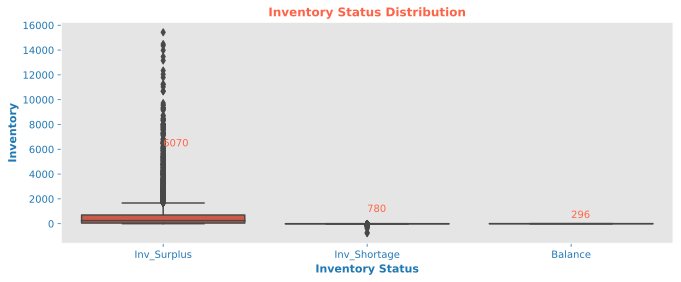

In [15]:
# Latest onhand inventory for each brand
latest_onhand_inv = end_inv_f[end_inv_f['endDate'] == end_inv_f['endDate'].max()] \
                    .groupby(['Brand', 'Description']).agg(Onhand_Stock=('onHand', 'sum')).reset_index()

# Merging the current stock levels with the previously calculated ss_data, 
# filling NaN values with 0, and selecting specific columns.
onhand_inv_data = ss_data.merge(latest_onhand_inv, on=['Brand', 'Description'], how='left').fillna({'Onhand_Stock': 0})
onhand_inv_data = onhand_inv_data[["Brand", "Description", "Optimal_SS", "Max_SS", "Onhand_Stock"]]
                         
#Determin Invetory status of each products, categorize them as  shortage or balance or surplus
onhand_inv_data['Inventory_Status'] = (onhand_inv_data['Onhand_Stock'] - onhand_inv_data['Optimal_SS'])

onhand_inv_data['Inv_Shortage/Surplus'] = np.where(onhand_inv_data['Inventory_Status'] < 0,'Inv_Shortage', 
                                          np.where(onhand_inv_data['Inventory_Status'] == 0, 'Balance', 'Inv_Surplus'))

inv_status = onhand_inv_data.set_index('Brand') # shorten onhand inventory data as inv_status
print("Random 10 rows from inv_status: \n", inv_status.sample(n=5, random_state=random.seed()))


#Inventory Status distribution 
fig, ax = plt.subplots(figsize=(11, 4))
sns.boxplot(data=inv_status, x="Inv_Shortage/Surplus", y="Inventory_Status",  ax=ax)
plt.xlabel("Inventory Status")
plt.ylabel("Inventory")
plt.title("Inventory Status Distribution")

#print count on the plot
for i, count in enumerate(inv_status['Inv_Shortage/Surplus'].value_counts()):
    plt.text(i, count, str(count), ha='left', va='bottom')
    
plt.show()

The box plot figure reveals that the company holds excessive inventory for approximately 85% of its products, incurring substantial inventory-holding costs. Simultaneously, there is an inventory shortage for 10% of its products. Therefore, only five percent of the company's 7146 products have a balanced inventory. The company needs to address this by reducing surplus inventory and filling inventory shortages to maintain balance.

#### 2.1.3 **`Reorder Points`**:<br/>

The reorder point is the level at which inventory needs to be replenished to prevent it from dropping below a certain threshold, which would risk it going out of stock. If the reorder point is negative, this indicates anomalies. In such cases, consider using maximum daily sales instead of average daily sales to determine the reorder point, and replace the value accordingly.

$$
\text{Reorder Point (RoP)} = Demand\_during\_Lead\_Time + Safety\_Stock \\
                           = Average\_Sales\_per\_day \times average\_Lead\_time + Safety\_Stock
$$


Count of rows where RoP is less than zero: 5

Reorder point for each product--> 10 random rows: 
                        Description  Max_Sales_Qty  Tot_SalesQty  Avg_Sales/Day  Max_LT_inDays  Avg_LT_inDays  Optimal_SS  Max_SS   RoP
Brand                                                                                                                                 
24275         Becker Family Pnt Bl              1             4           0.07             10          10.00         0.0     0.0   1.0
11022      Hogue Cab Svgn Columbia              1             2           0.03             11           8.08         1.0     1.0   0.0
39736      Krupp Bros Veraison Red              1             2           0.03             11           8.57         1.0     1.0   0.0
38133  Il Bastardo Sangiovese Tosc             31          2851          48.32             14           7.23       328.0   328.0  22.0
8655                  Plomari Ouzo             12           176           2.98             1

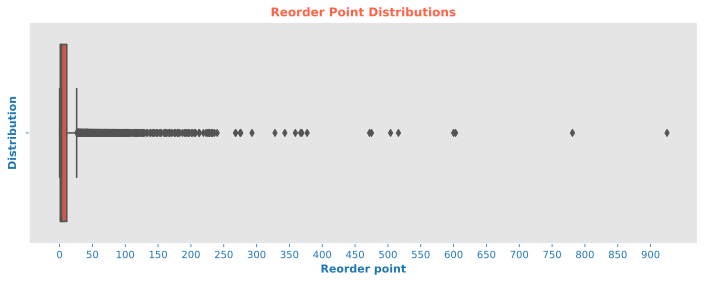

In [16]:
#add reorder point(RoP) to ss-data
ss_data["RoP"] = np.ceil((ss_data["Avg_Sales/Day"] * ss_data["Avg_LT_inDays"]) - ss_data["Optimal_SS"])
ss_data["RoP"] = ss_data["RoP"].replace(-0, 0) # -0 is -ve value close to zero and rounded to 0. Hence replace it with 0
RoP_Summary = ss_data[["Brand", "Description", "Max_Sales_Qty", "Tot_SalesQty", "Avg_Sales/Day", 
                       "Max_LT_inDays", "Avg_LT_inDays", "Optimal_SS", "Max_SS", "RoP"]].set_index('Brand')

# Find rows where RoP is less than zero and replace it with the value of RoP max
RoP_max = RoP_Summary[RoP_Summary["RoP"] < 0]
print("Count of rows where RoP is less than zero:", len(RoP_max))

RoP_max['RoP_max'] = np.ceil((RoP_max["Avg_Sales/Day"] * RoP_max["Max_LT_inDays"]) - RoP_max["Optimal_SS"])
RoP_Summary.loc[RoP_Summary["RoP"] < 0, "RoP"] = RoP_max["RoP_max"]
RoP_max.drop(columns=["RoP_max"], inplace=True) # Drop the RoP_max column

print("\nReorder point for each product--> 10 random rows: \n", RoP_Summary.sample(5, random_state=random.seed()))

#Reorder points distribution 
fig, ax = plt.subplots(figsize=(12, 4))
sns.boxplot(data=RoP_Summary, x="RoP", ax=ax)
ax.set_xticks(range(0, int(RoP_Summary["RoP"].max()) + 1, 50)) # Mark x-axis by range of 50
ax.set_xlabel("Reorder point")
ax.set_ylabel("Distribution")
ax.set_title("Reorder Point Distributions")
plt.show()

From the box plot, it is evident that the reorder point for 97% of the products is less than 50 items. The remaining anomalies span up to over 900. These items are either sold in large quantities or have a larger lead time. However, since the maximum and minimum lead times for all products are relatively close, it suggests that these products have high sales volumes.


#### 2.1.4 **`Invetory ABC Analysis`**:

ABC analysis is a technique used in inventory management to classify items based on their value to the business. It helps companies prioritize inventory management efforts and allocate resources effectively. This formula is used to determine the value of each inventory item and classify them into A, B, and C categories.

- Category `A` items: These are the most important products for the company, characterized by high sales volumes, high purchasing saless, or both. In terms of sales, these items represent 10%–20% of the sold quantity, accounting for 60%–80% of the annual sales value.
- Category `B` items: These are less important items, consisting of 20%–30% of items sold, and accounting for 20%–30% of the annual sales amount.
- Category `C` items: These are the least important items in your inventory, comprising 50%–70% of the inventory sold and accounting for 5%–15% of the annual sales value.

In our approach, we conduct the ABC Analysis by comparing the product's annual sales to the total inventory's yearly sales revenue. It's worth noting that ABC Analysis can also be done based on inventory cost, purchasing cost, or profit margin.


In [17]:
# Merge relevant data from sales and purchases tables
ABC_Analysis_data = pd.merge(sales_f, purchases_f[['InventoryId', 'Store', 'Brand', 'Description', 
                                                   'Size', 'PurchasePrice']], 
                             on=['InventoryId', 'Store', 'Brand', 'Description', 'Size'])
# Select relevant columns
ABC_Analysis_data = ABC_Analysis_data[['Brand', 'Description', 'SalesQuantity', 'SalesPrice', 'PurchasePrice']]

# Group by Brand and Description and calculate summary statistics
ABC_Analysis_data_summary = ABC_Analysis_data.groupby(['Brand', "Description"]).agg(
                                    Cost_per_unit=("PurchasePrice", "mean"),
                                    Sales_per_unit=("SalesPrice", "mean"),
                                    Demand_Y=('SalesQuantity', 'sum')).round(2).reset_index()

# Calculate Sales_Y($000s) for all the products and sort by it-use sales quantity as product demand
ABC_Analysis_data_summary["Sales_Y($000s)"] = ((ABC_Analysis_data_summary["Sales_per_unit"] * 
                                               ABC_Analysis_data_summary["Demand_Y"]) / 1e3).round(3)
ABC_Analysis_data_summary = ABC_Analysis_data_summary.sort_values(by=["Sales_Y($000s)"], ascending=False)

# Calculate ratio of Sales_Y($000s) of each item to total Sales_Y($000s)
ABC_Analysis_data_summary["Ratio"] = (ABC_Analysis_data_summary["Sales_Y($000s)"].cumsum() / 
                                      ABC_Analysis_data_summary["Sales_Y($000s)"].sum()).round(2)

# Assign each item to the defined category and apply the function to the dataframe
def categorize(ratio):
    if ratio < 0.7: return 'A'
    elif ratio < 0.9: return 'B'
    else: return 'C'

ABC_Analysis_data_summary["Category"] = ABC_Analysis_data_summary["Ratio"].apply(categorize)
ABC_Analysis_data_summary.set_index('Brand', inplace=True)

print('ABC_Categorization of all products:\n', ABC_Analysis_data_summary.sample(5, random_state=random.seed()))

ABC_Categorization of all products:
                         Description  Cost_per_unit  Sales_per_unit  Demand_Y  Sales_Y($000s)  Ratio Category
Brand                                                                                                       
18637          Iris Vineyard Pnt Nr          13.07           19.99        64           1.279   1.00        C
17984         Volpaia Citto Toscana           9.86           14.99      1475          22.110   0.99        C
3730   UV Ruby Red Grapefruit Vodka           0.73            0.99      3488           3.453   1.00        C
10734  A Bichot Chablis Long Depaqt          11.72           17.99       365           6.566   1.00        C
2492   Crown Royal Hand Slct Barrel          41.66           54.99       611          33.599   0.98        C


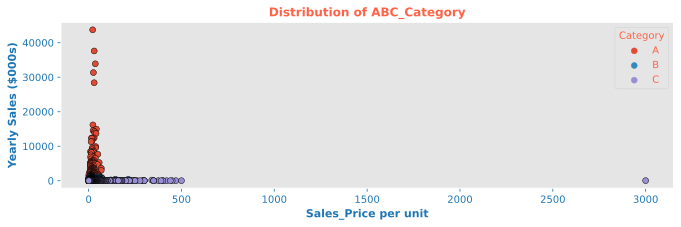

In [18]:
fig, ax = plt.subplots(figsize=(11, 3))
sns.scatterplot(data=ABC_Analysis_data_summary, x="Sales_per_unit", y="Sales_Y($000s)", hue="Category", 
                legend="full", marker='o', edgecolor='black')
plt.xlabel("Sales_Price per unit")
plt.ylabel("Yearly Sales ($000s)")
plt.title("Distribution of ABC_Category")
plt.legend(title="Category", loc="upper right")
plt.show()

There is one data point that stands out as anomalous. It is distinctly different from the rest, and doesn't fit into the general pattern we observe in the rest of the data. If we were to discard this singular outlier, it would result in a much clearer distribution of the data, allowing us to see the underlying trends and patterns with greater clarity.


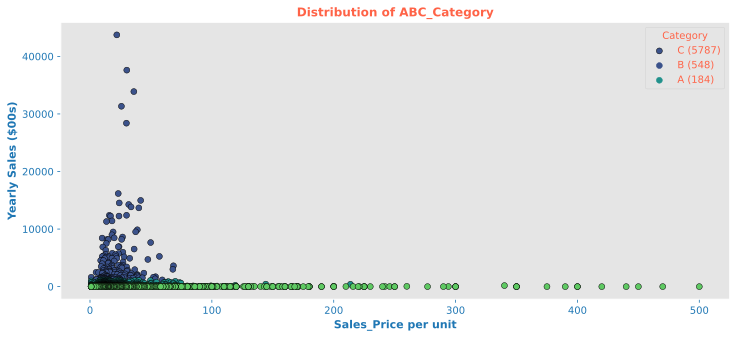

In [19]:
# Discard the anomalous outlier and add counts of each categories to the plot
filtered_data = ABC_Analysis_data_summary[ABC_Analysis_data_summary['Sales_per_unit'] <= 2500]

# # Create label for each category along the label count
category_counts = filtered_data['Category'].value_counts()
category_labels = {cat: f"{cat} ({count})" for cat, count in category_counts.items()}

fig, ax = plt.subplots(figsize=(12, 5))
sns.scatterplot(data=filtered_data, x="Sales_per_unit", y="Sales_Y($000s)", hue="Category", legend="full", 
                marker='o', edgecolor='black', palette="viridis")
plt.xlabel("Sales_Price per unit")
plt.ylabel("Yearly Sales ($00s)")
plt.title("Distribution of ABC_Category")
plt.legend(title="Category", labels=category_labels.values(), loc="upper right")
plt.show()

The scatter plot shows most high-priced products are in Class C, but they contribute less to total revenue. Class B contributes more to annual sales than Class C, but still less overall. Despite being fewer in quantity, Class A products contribute the most to yearly sales, making them the most valuable.

### 2.2 Other Inventory-Related Business Insights

We suggest the following inventory-related inquiries for further business understanding:

1. Which products have high inventory counts at the end of the inventory period, and do they fall into Class A in ABC inventory analysis?
2. Which products have low inventory counts at the end of the inventory period, did they register any sales in the previous year, and do they fall into Class C in ABC inventory analysis?
3. Identify products with large inventories but low annual sales, and conversely, use the ratio of annual sales to ending inventory for this analysis.
4. Do products with larger safety stocks record higher sales volumes, and to which category in ABC Analysis do they belong?
5. List the top 10 products that require immediate reordering along with their reorder quantities.
6. Determine each category's contribution to total revenue based on the ABC inventory analysis.
7. Identify the top 10 products from each category that contribute most to the annual total revenue.
8. Identify the top 10 products from each category that contribute least to the annual total revenue.


`1. Which products have high inventory counts at the end of the inventory period, and do they fall into Class A in ABC inventory analysis?`


Top 10 products with large onhand inventory and thier ABC categories: 
    Brand                   Description  Onhand_inventory(000s)  Sales_Y($000s)  Ratio Category
0   3545               Ketel One Vodka                  16.770       37610.672   0.07        A
1   4261        Capt Morgan Spiced Rum                  16.769       43735.493   0.04        A
2   8111             Smirnoff 80 Proof                  16.242        1620.471   0.63        A
3   8068              Absolut 80 Proof                  15.608       31336.011   0.12        A
4   1233       Jack Daniels No 7 Black                  15.047       33885.881   0.09        A
5   3102             Smirnoff Traveler                  14.208        9008.331   0.31        A
6   5111  Dr McGillicuddy's Mentholmnt                  13.804         717.404   0.75        B
7   1376                      Jim Beam                  13.180       16173.888   0.16        A
8   6570  Kendall Jackson Chard Vt RSV                  13.016       1130

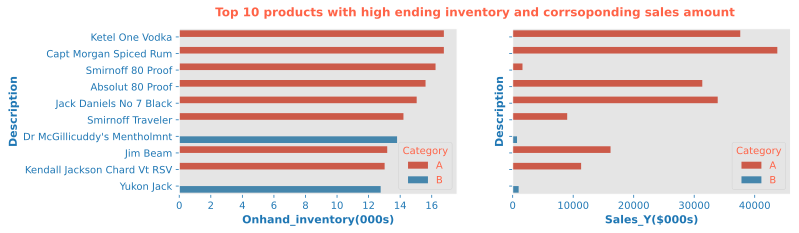

In [20]:
# Sum onHand inventory and convert to thousand units, then select the top 10
end_inv_f_top10 = end_inv_f.groupby(['Brand', "Description"])['onHand'].sum().div(1000).\
                                nlargest(10).reset_index(name='Onhand_inventory(000s)')
# Merge end_env_f_top10 with ABC_Analysis_data_summary to know the ABC categories of each  products
end_inv_f_top10_ABC = pd.merge(end_inv_f_top10, 
                                 ABC_Analysis_data_summary.reset_index()[['Brand', 'Description', 'Sales_Y($000s)', 'Ratio', 'Category']],
                                 on=['Brand', 'Description'])
# Print the top 10 items with their categories
print("Top 10 products with large onhand inventory and thier ABC categories: \n", end_inv_f_top10_ABC)

# Create the horizontal bar plot to compare evaluate those products sales amount
fig, axes = plt.subplots(1, 2, figsize=(11, 3), sharey= True)
fig.suptitle("Top 10 products with high ending inventory and corrsoponding sales amount", 
             color ='tomato', weight='bold', fontsize=12)
sns.barplot(data=end_inv_f_top10_ABC, x="Onhand_inventory(000s)", y="Description", hue="Category",  ax=axes[0])
sns.barplot(data=end_inv_f_top10_ABC, x="Sales_Y($000s)", y="Description", hue="Category", ax=axes[1])
plt.show()

The print output and the horizontal bar plot showcase the top 10 products in the company's largest inventory. The ABC classification reveals that the majority of these items fall under category A, indicating they are the most valuable in terms of their contribution to the company's total revenue. However, Dr McGillicuddy's Mentholmint and Yukon Jack are considered category B, despite the company holding a large inventory of them. This is due to their relatively low contribution to the company's total revenue compared to their inventory. This important insight can help the company optimize its inventory better.

The figure indicates that, despite having an inventory similar to other top 10 items, category B products contribute substantially less to total sales revenue than category A products. Smirnoff 80 Proof is also on the verge of falling into less significant categories.


`2. Which products have low inventory counts at the end of the inventory period, did they register any sales in the previous year, and do they fall into Class C in ABC inventory analysis?`


In [21]:
# Sum onHand inventory and convert to thousand units, then select the lowest 10
end_inv_f_lowest = end_inv_f.groupby(['Brand', 'Description']).agg(
                                    Onhand_inventory = ('onHand', 'sum')).reset_index()
end_env_f_lowest10 = end_inv_f_lowest.nsmallest(10, 'Onhand_inventory')

# Merge end_env_f_top10 with ABC_Analysis_data_summary to know the ABC categories of each  products
end_inv_f_lowest10_ABC = pd.merge(end_env_f_lowest10, 
                                 ABC_Analysis_data_summary.reset_index()[['Brand', 'Description', 'Sales_Y($000s)', 'Category']], on=['Brand', 'Description'])
# Print the top 10 items with their categories
print(" 10 items with lowest ending inventory with ABC categories: \n", end_inv_f_lowest10_ABC)

 10 items with lowest ending inventory with ABC categories: 
    Brand                  Description  Onhand_inventory  Sales_Y($000s) Category
0    319  Peter Paul Bacigalupi Chard                 0            0.56        C
1   2096    The Macallan Edition No 1                 0            1.30        C


The top 10 items with low on-hand ending inventory are those with an on-hand inventory of zero. The ones listed above are the first in alphabetical order, and there are more of them. However, only two of them are listed in the sales data. This means that only two of these ten items have any sort of sales, and their sales amount in millions is approximately zero. Hence, this is another significant business insight: the company is holding inventory for which it has no sales at all.


In [22]:
end_inv_f_lowest_ABC = pd.merge(end_inv_f_lowest, 
                                ABC_Analysis_data_summary.reset_index()[['Brand','Description', 'Sales_Y($000s)', 
                                                                         'Category']],on=['Brand', 'Description'])
end_inv_f_lowest10_ABC = end_inv_f_lowest_ABC[end_inv_f_lowest_ABC['Sales_Y($000s)']>0]
end_inv_f_lowest10_ABC  = end_inv_f_lowest_ABC.sort_values(
                          by=['Onhand_inventory', 'Sales_Y($000s)']).\
                              nsmallest(10, 'Onhand_inventory')
print('Products with Minimum Ending Inventory but Sold \n', end_inv_f_lowest10_ABC)

Products with Minimum Ending Inventory but Sold 
       Brand                   Description  Onhand_inventory  Sales_Y($000s) Category
828    3058            Three Olives Vodka                 0           0.002        C
3476  19754     BV Coastal Estate Moscato                 0           0.011        C
2773  14826     My Big Fat Greek Red Wine                 0           0.012        C
3893  22478  Mionetto IL Lambrusco Sprklg                 0           0.014        C
3829  22032     Hob Nob Wicked Red Ltd Ed                 0           0.020        C
2516  12429  F Coppola Diamnd Petite Sira                 0           0.030        C
5676  45059     Falesco Sangiovese Umbria                 0           0.030        C
2502  12340        La Atalaya Almansa Red                 0           0.032        C
2764  14711     Ch Tanunda Gr Barossa Rsl                 0           0.060        C
3602  20722           Ch Musar Hochar Red                 0           0.060        C


These are the first 10 items on the list with the lowest ending inventory and least selling amount. Clearly, all these items fall into category C of ABC analysis, indicating they are of least importance to the company.


`3. Identify products with large inventories but low annual sales, and conversely, use the ratio of annual sales to ending inventory for this analysis.`


      Brand                Description  Onhand_inventory  Sales_Y Category  sales/onhand_inv
5337  39834    Kenwood Cab Svgn Sonoma                30      9.0        C               0.0
1701   6066  Sauza Sparkling Margarita                30      7.0        C               0.0
3696  21282          Lunetta Rose Brut                29     12.0        C               0.0


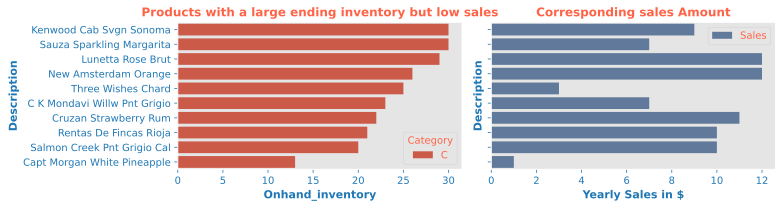

In [23]:
# Aggregate onHand Inventory grouped by Brand
end_inv_f_grouped = end_inv_f.groupby(['Brand', 'Description']).agg(
                    Onhand_inventory=('onHand', 'sum')).reset_index()

end_inv_f_merged = pd.merge(end_inv_f_grouped, 
                            ABC_Analysis_data_summary.reset_index()[['Brand','Description', 'Sales_Y($000s)', 
                                                                     'Category']],on=['Brand', 'Description'])
# Calculate the ratio of on-hand inventory to yearly sales, for that onhand inventory should be > 0
end_inv_f_merged = end_inv_f_merged[end_inv_f_merged['Onhand_inventory']>0]
end_inv_f_merged['sales/onhand_inv'] = ((end_inv_f_merged['Sales_Y($000s)']).div(
                                        end_inv_f_merged['Onhand_inventory'])).round(3)
# Sorted by max sales/onhand_in and on-hand inventory but lowest sales.
end_inv_f_sorted1 = end_inv_f_merged.sort_values(by=['sales/onhand_inv', 'Onhand_inventory', 'Sales_Y($000s)'],
                                                ascending=[False, False, False]).tail(10)
#Since we are filtering low sales, insead 1000s, we count in 1s
end_inv_f_sorted1['Sales_Y($000s)'] = end_inv_f_sorted1['Sales_Y($000s)'] * 1000
end_inv_f_sorted1.rename(columns={'Sales_Y($000s)': 'Sales_Y'}, inplace= True)

print(end_inv_f_sorted1.head(3))
#Plot the figures
fig, axs = plt.subplots(1, 2, figsize=(11, 3), dpi=150, sharey=True)
sns.barplot(data=end_inv_f_sorted1, y='Description', x='Onhand_inventory', hue = 'Category', ax=axs[0])
axs[0].set_xlabel('Onhand_inventory')
axs[0].set_title('Products with a large ending inventory but low sales')

sns.barplot(data=end_inv_f_sorted1, y='Description', x='Sales_Y', color='#5778a4', label = 'Sales', ax=axs[1])
axs[1].set_xlabel('Yearly Sales in $')
axs[1].set_title('Corresponding sales Amount')
axs[1].legend()

plt.tight_layout()
plt.show()

This graph illustrates the products with high sales but comparatively low inventory. Notably, all these items fall under the Class C category of ABC Analysis, indicating they have the least business value. The inventory level of these products needs balancing. The company holds a large amount of inventory for products with significantly small sales. Therefore, optimization of these products should be prioritized, along with items having a large on-hand inventory but no sales.


`4. Do products with larger safety stocks record higher sales volumes, and to which category in ABC Analysis do they belong?`


      Brand             Description  Optimal_SS  Tot_SalesQty  Sales_Y($000s) Category
2290   8111       Smirnoff 80 Proof      3087.0         28544        1620.471        A
1477   4261  Capt Morgan Spiced Rum      2284.0         20226       43735.493        A
527    1892              Yukon Jack      2085.0         23121         985.419        B


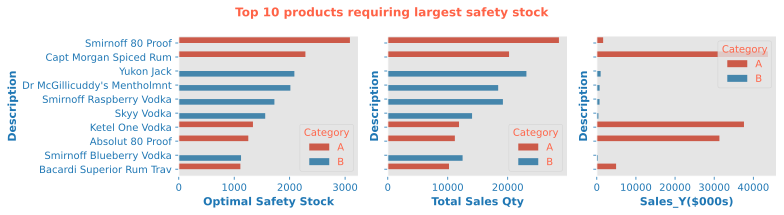

In [24]:
#merge safety stock and ABC analysis summary data and select relevant cols
ss_data_summary.head(3)
ss_data_summary_ABC = pd.merge(ss_data_summary.reset_index()[['Brand', 'Description', 'Optimal_SS', 'Tot_SalesQty']],
                              ABC_Analysis_data_summary.reset_index()[['Brand','Description', 'Sales_Y($000s)', 
                                                                       'Category']],on=['Brand', 'Description'])
ss_data_summary_ABC10 = ss_data_summary_ABC.sort_values(by=['Optimal_SS','Tot_SalesQty', 'Sales_Y($000s)'],
                                                      ascending=False).head(10)
print(ss_data_summary_ABC10.head(3))

#Plot and compare 
#Plot the figures
fig, axs = plt.subplots(1, 3, figsize=(11, 3), sharey=True)
fig.suptitle("Top 10 products requiring largest safety stock", color = 'tomato', weight = 'bold', fontsize=12) 
sns.barplot(data=ss_data_summary_ABC10, y='Description', x='Optimal_SS', hue='Category', ax=axs[0])
axs[0].set_xlabel('Optimal Safety Stock')

sns.barplot(data=ss_data_summary_ABC10, y='Description', x='Tot_SalesQty', hue= 'Category', ax=axs[1])
axs[1].set_xlabel('Total Sales Qty')

sns.barplot(data=ss_data_summary_ABC10, y='Description', x='Sales_Y($000s)', hue= 'Category', ax=axs[2])
axs[2].set_xlabel('Sales_Y($000s)')

plt.tight_layout()
plt.show()

Products with larger safety stock often exhibit higher sales quantities, but this doesn't necessarily equate to higher Dollars sales amounts. The horizontal bar plot above demonstrates that while products with larger safety stock typically have higher sales quantities, there isn't a direct correlation with the Dolars sales amount.

ABC analysis Categorization, not all products with high safety stock fall into category A; some land in category B. This is because, despite large sales quantities, these products yield comparatively low dollar sales, leading to their classification as category B items. The key business insight is that prioritizing safety stock maintenance for category A items is essential.


`5. List the top 10 products that require immediate reordering along with their reorder quantities.` Indentify which of them are crucial for the company to proitirize the reorder.


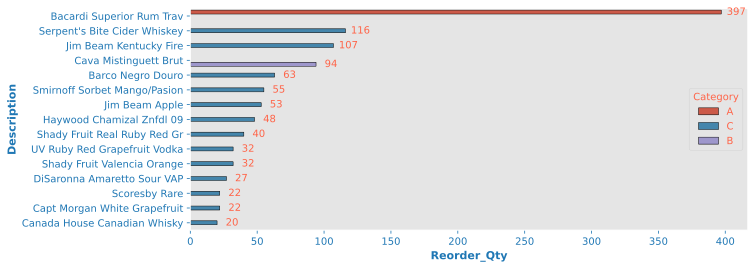

In [25]:
# Filter and calculate immediate reorder qty
Onhand_inv_data_c = pd.merge(onhand_inv_data, 
                                 ABC_Analysis_data_summary.reset_index()[["Brand", "Description", "Category"]],
                                 on=['Brand', 'Description'])
shortage_items = Onhand_inv_data_c[Onhand_inv_data_c["Inv_Shortage/Surplus"] == "Inv_Shortage"]
shortage_items['Reorder_Qty'] = shortage_items['Optimal_SS'] - abs(shortage_items['Inventory_Status'])
immediate_reorder_qty = shortage_items[shortage_items['Reorder_Qty'] > 0]

# Plot graph top 15 items that largest immidiate reorder quantity.
immediate_reorder_qty = immediate_reorder_qty.nlargest(15, 'Reorder_Qty')
fig, ax = plt.subplots(figsize=(10, 4))
sns.barplot(data=immediate_reorder_qty, x="Reorder_Qty", y="Description", hue="Category",
            edgecolor='black')
for p in ax.patches:
    ax.annotate(format(p.get_width(), '.0f'), 
                 (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2.), 
                 ha = 'center', va = 'center', xytext = (15, 0),  textcoords = 'offset points')
plt.show()

The figure above illustrates the top 15 products that require reordering and their corresponding reorder amounts. The ABC Analysis categorization reveals that the majority of the products listed are in category C, which signifies the least business value. However, the product at the top of the list is in category A and requires the largest reorder amount. Therefore, the company should immediately place a reorder request for the specified amount.


`6. Determine each category's contribution to total revenue based on the ABC inventory analysis.`


ABC_Analysis_Summary: 
   Category  Count  Sales_Y($000s)  Percentage
2        A    184      845496.818       69.49
1        B    548      243314.017       20.00
0        C   5788      127864.896       10.51


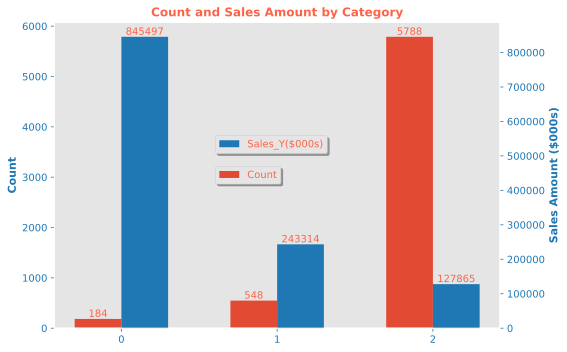

In [26]:
# Group ABC Analysis summary data by category and aggrate sales and count
total_sales_per_Category = ABC_Analysis_data_summary.groupby('Category').\
                                agg({'Sales_Y($000s)': 'sum'}).reset_index()
total_sales_per_Category['Percentage'] = (total_sales_per_Category['Sales_Y($000s)'] / 
                                          total_sales_per_Category['Sales_Y($000s)'].sum()).round(4)*100
counts_df = ABC_Analysis_data_summary['Category'].value_counts().reset_index()
counts_df.columns = ['Category', 'Count']
ABC_Analysis_Summary =  pd.merge(counts_df, total_sales_per_Category, on = "Category").sort_values(
                                by="Percentage", ascending=False)
print("ABC_Analysis_Summary: \n", ABC_Analysis_Summary)


fig, ax1 = plt.subplots(figsize=(8, 5))
bar_width = 0.3 # width of each bar
x_axis_index = np.arange(len(ABC_Analysis_Summary))
ax1.bar(x_axis_index - bar_width/2, ABC_Analysis_Summary['Count'], bar_width, label='Count')
ax2 = ax1.twinx() 
ax2.bar(x_axis_index + bar_width/2, ABC_Analysis_Summary['Sales_Y($000s)'], bar_width, 
        color='tab:blue', label='Sales_Y($000s)') 

for ax in [ax1, ax2]:
    # add labels // loop containers to label all sets of bars
    for container in ax.containers:
        values = container.datavalues
        labels = ["{:g}".format(val) for val in values]
        ax.bar_label(container, labels=labels)     
ax1.set_xticks(x_axis_index)
ax1.set_ylabel('Count')
ax2.set_ylabel('Sales Amount ($000s)')
ax1.legend(loc='center left', bbox_to_anchor=(0.35, 0.5), shadow=True)
ax2.legend(loc='center left', bbox_to_anchor=(0.35, 0.6), shadow=True)
plt.title('Count and Sales Amount by Category')
plt.tight_layout() 
plt.show()

The figure describes the significance of three categories: A, B, and C. Category A is the most important, as it comprises 2.8% of the items that contribute to 70% of the total revenue. These items are typically sold at higher prices, in larger quantities, or have high sales demand.

Category B is less important, with 8.3% of the total products contributing to 20% of the total revenue. Finally, Category C is the least important. It makes up 89% of the items in the inventory but contributes to only 10% of the total revenue. These items have a very low selling price or do not sell at all.

The company should identify and remove these items from the inventory list, especially if the inventory holding cost is typically 12-15% of the price. These items should be immediately replaced with other products that might have a better significance.


`7. Identify the top 10 products from each category that contribute most to the annual total revenue.`


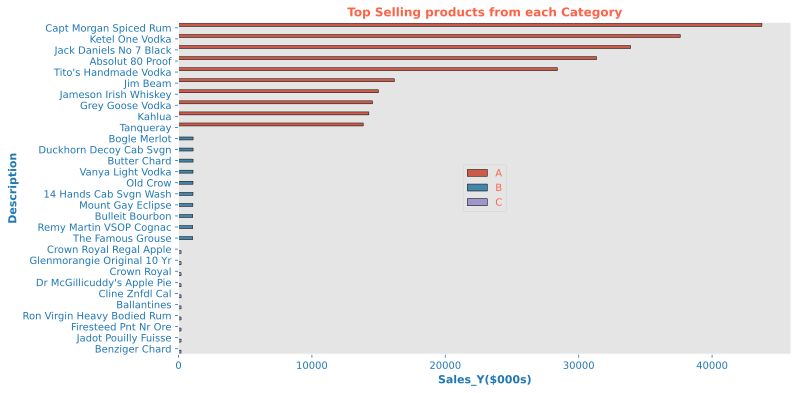

In [27]:
# Create a rank among the group based on Sales Amounts
ABC_Analysis_data_summary['rnk'] = ABC_Analysis_data_summary.groupby('Category')['Sales_Y($000s)'].\
                                   rank(method='first', ascending=False)
top5_contributing_to_sales = ABC_Analysis_data_summary[ABC_Analysis_data_summary['rnk'] <= 10]
top5_contributing_to_sales.sort_values(['Sales_Y($000s)', 'rnk'], inplace=True, ascending=False)
#plot
fig, ax = plt.subplots(figsize=(11, 6))
sns.barplot(data=top5_contributing_to_sales, x="Sales_Y($000s)", y="Description", 
            hue="Category", edgecolor='k', ax = ax)
ax.set_title("Top Selling products from each Category")
ax.legend(loc='center')
plt.show()

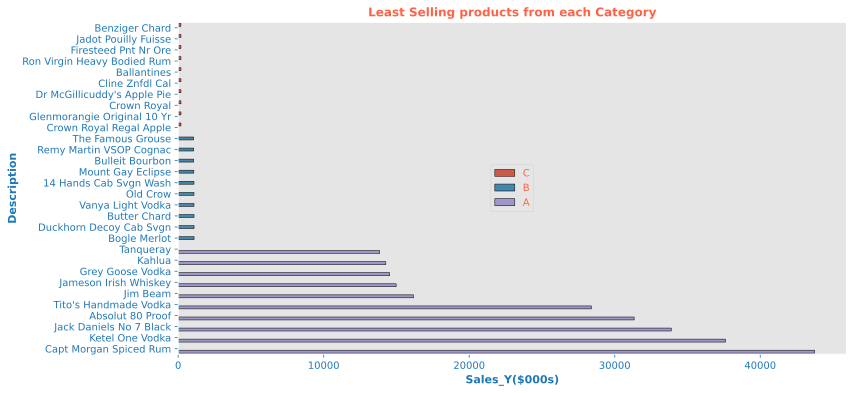

In [28]:
top5_contributing_to_sales = ABC_Analysis_data_summary[ABC_Analysis_data_summary['rnk'] <=10]
top5_contributing_to_sales.sort_values(['Sales_Y($000s)', 'rnk'], inplace=True, ascending=True)
#plot
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(data=top5_contributing_to_sales, x="Sales_Y($000s)", y="Description", 
            hue="Category", edgecolor='k', ax = ax)
ax.set_title("Least Selling products from each Category")
ax.legend(loc='center')
plt.show()

The two graphs above illustrate the items from ABC that contribute the most and least to total sales. This provides insight into which products should be prioritized. The graphs are self-explanatory.


## **`Part III: Extracting Purchases and Sales inights`**

### 3.1 `Purchases`

- Who are the the important vendors or supplier. Evaluate based on quantities of items supplied, values of the items and contirbution of the items to total revenue of the company. bottom vendors interms of quantity and value of supplies
- Who are the the least important vendors or supplier. Evaluate based on quantities of items supplied, values of the items and contirbution of the items to total revenue of the company. bottom vendors interms of quantity and value of supplies
- What is the average payment execution period for each vendor and how does it correlate with the purchase quantity or purchase value?


`1.Who are the the important vendors or supplier. Evaluate based on quantities of items supplied, values of the items and contirbution of the items to total revenue of the company. bottom vendors interms of quantity and value of supplies`


In [29]:
# Select relevant cols from purchase_f and sales_f and create required dataframe
purchase_data_cols = purchases_f[['Brand', 'Description', 'Size', 'VendorNumber', 
                                  'VendorName','Lead_Time', 'InvoiceDate', 'PayDate', 'PurchasePrice', 'Quantity', 'Dollars']]
#Add Payment Execution period.
purchase_data_cols['pay_exec_days'] = (purchase_data_cols['PayDate']-purchase_data_cols['InvoiceDate']).dt.days

purch_data_vendor = purchase_data_cols.groupby('VendorName').agg(PurchaseQty=('Quantity', 'sum'),
                                                                 PurchaseValue=('Dollars', 'sum')).reset_index()
sales_data_vendor = sales_f.groupby('VendorName').agg(SalesQuantity=('SalesQuantity', 'sum'),
                                                      SalesDollars=('SalesDollars', 'sum')).reset_index()
purchases_f_insight = pd.merge(purch_data_vendor, sales_data_vendor, on="VendorName").set_index('VendorName')

# Which Vendor Supplies the most quantity of items to the company
top10_vendors_Qty = purchases_f_insight.nlargest(10, "PurchaseQty")
print('Top10 vendors based on Qty of Supplies: \n', top10_vendors_Qty)

# Which Vendor Supplies the most $value of of items to the company
top10_vendors_value = purchases_f_insight.nlargest(10, "PurchaseValue")
print('\n\nTop10 vendors based on Dollar values of the supplies: \n', top10_vendors_value)

# Whose vendor supplies most contribute to the total sales revenue
top10_vendor_SalesContr = purchases_f_insight.nlargest(10, "SalesDollars")
print('\n\nTop10 vendors of its supplies to total revenue: \n', top10_vendor_SalesContr)

# Which vendors are the most important - relativey good in all the three metrics
VIP_Vendors = pd.concat([top10_vendors_Qty, top10_vendors_value, 
                                  top10_vendor_SalesContr], axis=0).drop_duplicates()
print('\n\nVery Important Vendors: \n', VIP_Vendors)

Top10 vendors based on Qty of Supplies: 
                             PurchaseQty  PurchaseValue  SalesQuantity  SalesDollars
VendorName                                                                         
DIAGEO NORTH AMERICA INC        5459788    50959796.85         423895    4832706.85
JIM BEAM BRANDS COMPANY         2737165    24203151.05         207599    2522931.01
MARTIGNETTI COMPANIES           2640411    27861690.02         182664    3118227.16
CONSTELLATION BRANDS INC        2325892    15573917.90         168402    1879079.02
E & J GALLO WINERY              1858260    12289608.09         143047    1527351.89
PERNOD RICARD USA               1647558    24124091.56         109318    2216331.21
BACARDI USA INC                 1427075    17624378.72         101595    1663604.55
SAZERAC CO INC                  1417727     9916770.26          95420     949459.20
M S WALKER INC                  1372841    10935817.30         110218    1300864.08
ULTRA BEVERAGE COMPANY LLP      10

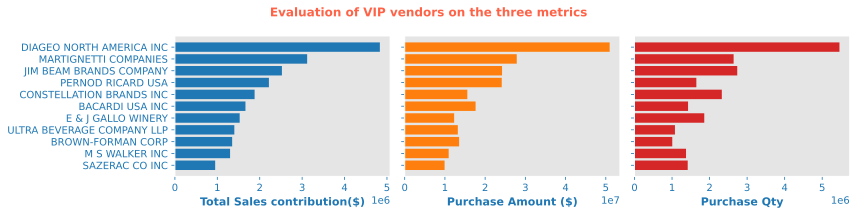

In [30]:
#Compare and rank the performance of VeryImportantVendors based on three key metrics.
VIP_Vendors = VIP_Vendors.sort_values(by=['SalesDollars', 'PurchaseValue', 'PurchaseQty'], ascending=True).reset_index()
# Plotting
fig, axs = plt.subplots(1, 3, figsize=(12, 3), sharey=True)
fig.suptitle("Evaluation of VIP vendors on the three metrics", color = 'tomato', weight = 'bold', fontsize=12) 
axs[0].barh(VIP_Vendors['VendorName'], VIP_Vendors['SalesDollars'], color='tab:blue')
axs[0].set_xlabel('Total Sales contribution($)')

axs[1].barh(VIP_Vendors['VendorName'], VIP_Vendors['PurchaseValue'], color='tab:orange')
axs[1].set_xlabel('Purchase Amount ($)')

axs[2].barh(VIP_Vendors['VendorName'], VIP_Vendors['PurchaseQty'], color='tab:red')
axs[2].set_xlabel('Purchase Qty')

plt.tight_layout()
plt.show()

`- Who are the the least important vendors or supplier. Evaluate based on quantities of items supplied, values of the items and contirbution of the items to total revenue of the company. bottom vendors interms of quantity and value of supplies`


In [31]:
# Which Vendor Supplies the least quantity of items to the company
purchases_f_insight = pd.merge(purch_data_vendor, sales_data_vendor, on="VendorName", how='inner').set_index('VendorName')
least10_vendors_Qty = purchases_f_insight.nsmallest(10, "PurchaseQty")
print('least10 vendors based on Qty of Supplies: \n', least10_vendors_Qty)

# Which Vendor Supplies the least $value of of items to the company
least10_vendors_value = purchases_f_insight.nsmallest(10, "PurchaseValue")
print('\n\nleast10 vendors based on Dollar values of the supplies: \n', least10_vendors_value)

# Whose vendor supplies least contribute to the total sales revenue
least10_vendor_SalesContr = purchases_f_insight.nsmallest(10, "SalesDollars")
print('\n\nleast10 vendors of its supplies to total revenue: \n', least10_vendor_SalesContr)

# Which vendors are the least important - relativey good in all the three metrics
LIP_Vendors = pd.concat([least10_vendors_Qty, least10_vendors_value, 
                                  least10_vendor_SalesContr], axis=0).drop_duplicates()
print('\n\n Least Important Vendors: \n', LIP_Vendors)

least10 vendors based on Qty of Supplies: 
                                PurchaseQty  PurchaseValue  SalesQuantity  SalesDollars
VendorName                                                                            
CAPSTONE INTERNATIONAL                   4          54.64             12        227.88
SILVER MOUNTAIN CIDERS                  17          77.18              3         20.97
FANTASY FINE WINES CORP                 24         128.64             10         79.90
BLACK ROCK SPIRITS LLC                  82        1152.10              6        149.94
STAR INDUSTRIES INC.                   151        2452.29             25        576.75
VINEDREA WINES LLC                     205        4657.60             39       1169.61
APPOLO VINEYARDS LLC                   230        2399.70              8        123.92
MILTONS DISTRIBUTING CO                267        1824.18             58        494.32
IRA GOLDMAN AND WILLIAMS, LLP          328        5630.88              2         73.98

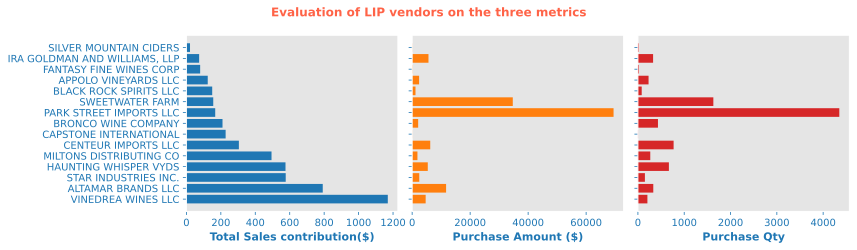

In [32]:
#Compare and rank the performance of VeryImportantVendors based on three key metrics.
LIP_Vendors = LIP_Vendors.sort_values(by=['SalesDollars', 'PurchaseValue', 'PurchaseQty'], 
                                      ascending=False).reset_index()
# Plotting
fig, axs = plt.subplots(1, 3, figsize=(12, 3.5), sharey=True)
fig.suptitle("Evaluation of LIP vendors on the three metrics", color = 'tomato', weight = 'bold', fontsize=12) 
axs[0].barh(LIP_Vendors['VendorName'], LIP_Vendors['SalesDollars'], color='tab:blue')
axs[0].set_xlabel('Total Sales contribution($)')

axs[1].barh(LIP_Vendors['VendorName'], LIP_Vendors['PurchaseValue'], color='tab:orange')
axs[1].set_xlabel('Purchase Amount ($)')

axs[2].barh(LIP_Vendors['VendorName'], LIP_Vendors['PurchaseQty'], color='tab:red')
axs[2].set_xlabel('Purchase Qty')

plt.tight_layout()
plt.show()

`What is the average payment execution period for each vendor and how does it correlate with the purchase quantity or purchase value?`


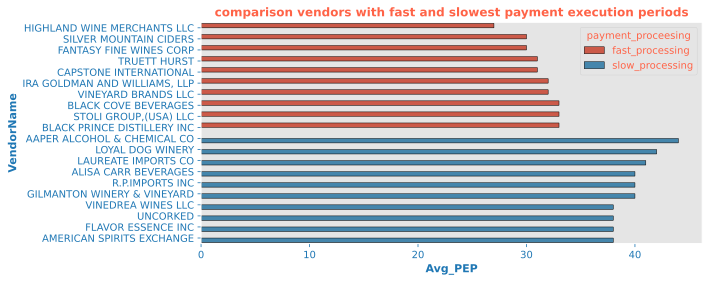

In [33]:
pay_excute_period = purchase_data_cols.groupby('VendorName').agg(
                                Avg_PEP=('pay_exec_days', 'mean'),
                                Avg_PurchaseQty = ('Quantity', 'mean'),
                                Avr_PurchaseValue=('Dollars', 'mean')).reset_index().round(0)
# Identify vendors that execute payments fast  and label it as such
top10_fast_pay_exe_vendor = (pay_excute_period.sort_values(by=["Avg_PEP"], ascending=True).head(10))
#Label it- Fast_Payment_Processing
top10_fast_pay_exe_vendor['payment_proceesing'] = "fast_processing"

top10_slow_pay_exe_vendor =  (pay_excute_period.sort_values(by=["Avg_PEP"], ascending=False).head(10))
top10_slow_pay_exe_vendor['payment_proceesing'] = "slow_processing"

#Concat and compare
Fast_Slow_Pay_Exec = pd.concat([top10_fast_pay_exe_vendor, top10_slow_pay_exe_vendor], axis=0)
#print(Fast_Slow_Pay_Exec[['VendorName', 'Avg_Payment_Execution_Period', 'payment_proceesing']])

fig, ax = plt.subplots(figsize=(9, 4))
sns.barplot(data=Fast_Slow_Pay_Exec, x="Avg_PEP", y="VendorName", hue="payment_proceesing", edgecolor='k', ax = ax)
ax.set_title("comparison vendors with fast and slowest payment execution periods")
plt.show()

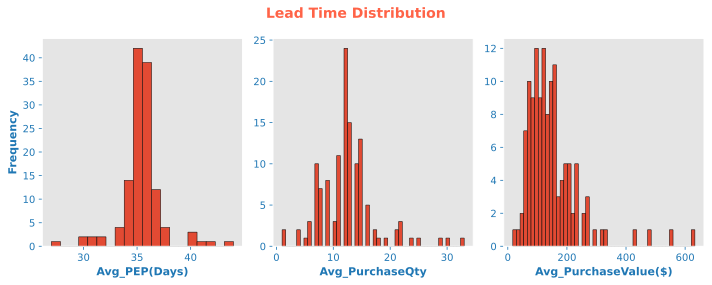

In [34]:
# Plot the distribution of Average paymemnt executions period and compare it avg purchase quantity and value. 
fig, axes = plt.subplots(1, 3)
fig.suptitle("Lead Time Distribution", color = 'tomato', weight = 'bold', fontsize=14) 
axes[0].hist(pay_excute_period["Avg_PEP"], bins=20, density=False, edgecolor="k", label="Average PEP")
axes[0].set_xlabel("Avg_PEP(Days)") 
axes[0].set_ylabel("Frequency")
axes[1].hist(pay_excute_period["Avg_PurchaseQty"], bins=50, density=False, edgecolor="k", label="Avg_PurchaseQty")
axes[1].set_xlabel("Avg_PurchaseQty")
axes[2].hist(pay_excute_period["Avr_PurchaseValue"], bins=50, density=False, edgecolor="k", label="Avr_PurchaseValue")
axes[2].set_xlabel("Avg_PurchaseValue($)")
fig.tight_layout()
plt.show()

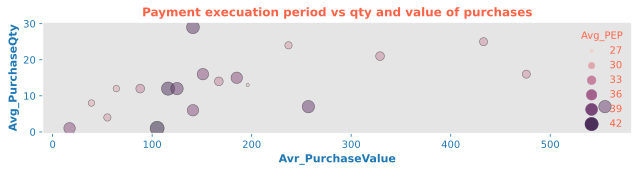

In [35]:
# Is there any correlation between between the payment execution speed and the quantiy and value of purchases
fig, ax = plt.subplots(figsize=(9, 2.5))
ax = sns.scatterplot(x=Fast_Slow_Pay_Exec["Avr_PurchaseValue"],y=Fast_Slow_Pay_Exec["Avg_PurchaseQty"],
                     size=Fast_Slow_Pay_Exec["Avg_PEP"], hue=Fast_Slow_Pay_Exec["Avg_PEP"],
                     sizes=(10, 200), alpha=0.5, edgecolor="k", ax = ax)
plt.ylabel("Avg_PurchaseQty")
plt.xlabel("Avr_PurchaseValue")
ax.legend(title="Avg_PEP", loc="upper right",frameon=False)
ax.set_title("Payment execuation period vs qty and value of purchases")
plt.tight_layout()
plt.show()

Although the histogram plot suggests that the distribution of the average payment execution period resembles that of the average purchase value and quantity, the bubble scatter plot contradicts this. Therefore, the payment execution period is likely influenced by external factors such as banking or credit systems.

### 3.1 `Sales Insights`

To extract meaningful sales business insights, we ask the following questions:

1. Which products sell the most in terms of quantity and dollar sales amount, and conversely, which ones sell the least?
2. How does the sales performance of different stores compare, and which are the top 10 stores with the highest sales output?
3. Which product size sells the most?
4. Can we project and identify the sales trends throughout the year?


`1.  Which products sell the most in terms of quantity and dollar sales amount, and conversely, which ones sell the least?.`


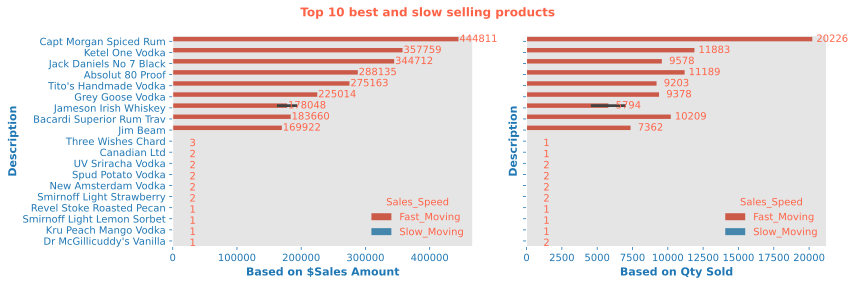

In [36]:
# Retrieve relevant cols and identify top 10 best and slow selling products and label them as such.
sales_f_sel_cols = sales_f[['Store', 'Brand', 'Description', 'Size', 'SalesQuantity', 
                                  'SalesPrice','SalesDollars', 'SalesDate']]
# Sales Analysis based on product type
sales_f_prod_type = sales_f_sel_cols.groupby(['Brand', 'Description']).agg(
                                    SalesQuantity=('SalesQuantity', 'sum'),
                                    SalesDollars=('SalesDollars', 'sum')).reset_index()
best_selling_prods10 = sales_f_prod_type.sort_values(by=['SalesDollars', 'SalesQuantity'], ascending=False).head(10)
slow_selling_prods10 = sales_f_prod_type.sort_values(by=['SalesDollars', 'SalesQuantity'], ascending=False).tail(10)

best_selling_prods10['Sales_Speed'] = "Fast_Moving"
slow_selling_prods10['Sales_Speed'] = "Slow_Moving"
Sales_f_amount10 = pd.concat([best_selling_prods10, slow_selling_prods10], axis=0)

# plot them side by side for comparison 
fig, axs = plt.subplots(1, 2, figsize=(12, 4), sharey=True)
fig.suptitle("Top 10 best and slow selling products", color='tomato', weight='bold', fontsize=12)

sns.barplot(data=Sales_f_amount10, y='Description', x='SalesDollars', hue='Sales_Speed', ax=axs[0])
axs[0].set_xlabel('Based on $Sales Amount')
axs[0].legend(title= 'Sales_Speed', loc="lower right",frameon=False)
for p in axs[0].patches:
    axs[0].annotate(format(p.get_width(), '.0f'), (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2.), 
                    ha='center', va='center', xytext=(20, 0), textcoords='offset points')

sns.barplot(data=Sales_f_amount10, y='Description', x='SalesQuantity', hue='Sales_Speed', ax=axs[1])
axs[1].set_xlabel('Based on Qty Sold')
axs[1].legend(title="Sales_Speed", loc="lower right",frameon=False)
for p in axs[1].patches:
    axs[1].annotate(format(p.get_width(), '.0f'), (p.get_x() + p.get_width(), p.get_y() + p.get_height() / 2.), 
                    ha='center', va='center', xytext=(20, 0), textcoords='offset points')
plt.tight_layout()
plt.show()

The bar plot above compares the best and worst-selling products. Some products have sales amounts of about half a million and quantities of about 20,000. Conversely, there are also slow-moving products with sales quantities as low as one and sales amounts less than a dollar. Therefore, the company should remove these slow-selling items from next year's list and replace them with high-demand products.

`2. How does the sales performance of different stores compare, and which are the top 10 stores with the highest sales output?`


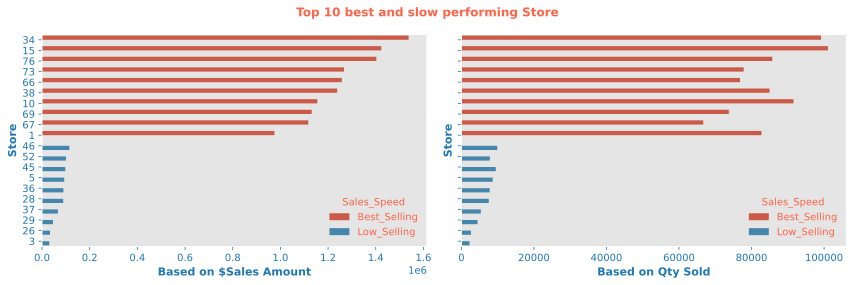

In [37]:
#Compare sales performance of different stores
sales_f_store = sales_f_sel_cols.groupby(['Store']).agg(
                                    SalesQuantity=('SalesQuantity', 'sum'),
                                    SalesDollars=('SalesDollars', 'sum')).reset_index()
best_selling_store10 = sales_f_store.sort_values(by=['SalesDollars', 'SalesQuantity'],ascending=False).head(10)
worest_selling_store10 = sales_f_store.sort_values(by=['SalesDollars', 'SalesQuantity'],ascending=False).tail(10)

#Lable them as Best_Selling and Low_Selling Store
best_selling_store10['Performance'] = "Best_Selling"
worest_selling_store10['Performance'] = "Low_Selling"
# Compare them
store_performance10 = pd.concat([best_selling_store10, worest_selling_store10], axis=0)
store_performance10['Store'] = store_performance10['Store'].astype(str) # to consider it as categorical feature

# plot them side by side for comparison 
fig, axs = plt.subplots(1, 2, figsize=(12, 4), sharey=True)
fig.suptitle("Top 10 best and slow performing Store", color='tomato', weight='bold', fontsize=12)

sns.barplot(data=store_performance10, y='Store', x='SalesDollars', hue='Performance', ax=axs[0])
axs[0].set_xlabel('Based on $Sales Amount')
axs[0].legend(title= 'Sales_Speed', loc="lower right",frameon=False)
sns.barplot(data=store_performance10, y='Store', x='SalesQuantity',  hue='Performance', ax=axs[1])
axs[1].set_xlabel('Based on Qty Sold')
axs[1].legend(title="Sales_Speed", loc="lower right",frameon=False)

plt.tight_layout()
plt.show()


The horizontal bar plot above compares store performances. The best-performing store has sales of about 1.5 million and a total of 100,000 sold items. Conversely, the worst-performing store has sales of less than $2500 during this period. A decision should be made regarding this store's future, to determine if it's worth continuing its operation or not.


`Which product size sells the most, which are not?`


Unique count of Sizes:  31


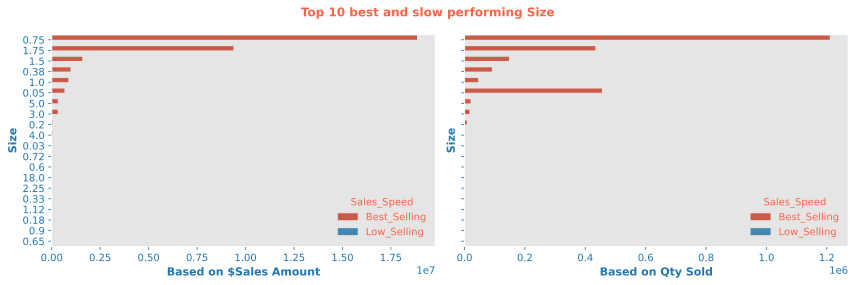

In [38]:
#Compare sales performance of different Sizes
sales_f_Size = sales_f_sel_cols.groupby(['Size']).agg(
                                    SalesQuantity=('SalesQuantity', 'sum'),
                                    SalesDollars=('SalesDollars', 'sum')).reset_index()
print("Unique count of Sizes: ",sales_f_Size['Size'].nunique())
best_selling_Size10 = sales_f_Size.sort_values(by=['SalesDollars', 'SalesQuantity'],ascending=False).head(10)
worest_selling_Size10 = sales_f_Size.sort_values(by=['SalesDollars', 'SalesQuantity'],ascending=False).tail(10)
best_selling_Size10['Performance'] = "Best_Selling"
worest_selling_Size10['Performance'] = "Low_Selling"
# Compare them
Size_performance10 = pd.concat([best_selling_Size10, worest_selling_Size10], axis=0)
Size_performance10['Size'] = Size_performance10['Size'].astype(str) 

# plot them side by side for comparison 
fig, axs = plt.subplots(1, 2, figsize=(12, 4), sharey=True)
fig.suptitle("Top 10 best and slow performing Size", color='tomato', weight='bold', fontsize=12)
sns.barplot(data=Size_performance10, y='Size', x='SalesDollars', hue='Performance', ax=axs[0])
axs[0].set_xlabel('Based on $Sales Amount')
axs[0].legend(title= 'Sales_Speed', loc="lower right",frameon=False)
sns.barplot(data=Size_performance10, y='Size', x='SalesQuantity',  hue='Performance', ax=axs[1])
axs[1].set_xlabel('Based on Qty Sold')
axs[1].legend(title="Sales_Speed", loc="lower right",frameon=False)
plt.tight_layout()
plt.show()

The horizontal bar plots indicate that, out of 31 available product sizes, only eight have significant sales quantities and corresponding dollar sales amounts. The 0.75L or 750ml size is the best-selling in terms of both quantity and dollar sales. Therefore, the company should be mindful of what product size to order.


`4. Can we project and identify the sales trends throughout the year?`


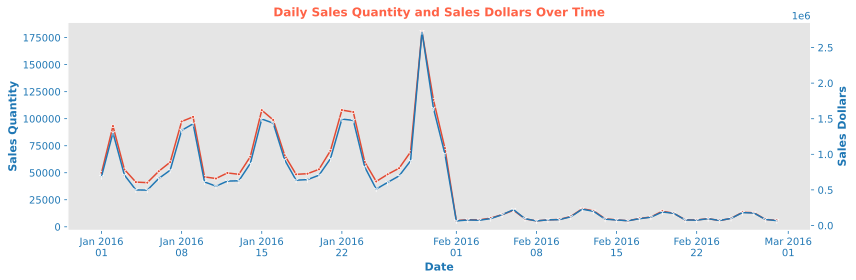

In [39]:
# Group by 'SalesDate' and aggregate sales quantity and dollars
sales_f_trends = sales_f_sel_cols.groupby('SalesDate').agg(
                                    SalesQuantity=('SalesQuantity', 'sum'),
                                    SalesDollars=('SalesDollars', 'sum')).reset_index()

# Plotting sales quantity and sales dollars using Seaborn
fig, ax1 = plt.subplots(figsize=(12, 4))
sns.lineplot(data=sales_f_trends, x='SalesDate', y='SalesQuantity', marker='.', ax=ax1)
ax2 = ax1.twinx() 
sns.lineplot(data=sales_f_trends, x='SalesDate', y='SalesDollars', marker='1', color='tab:blue', ax=ax2)
date_form = DateFormatter("%b %Y\n%d")  # Show month and year along with day
ax1.xaxis.set_major_formatter(date_form) # Formatting x-axis ticks
plt.xticks(rotation=45) 
ax1.set_xlabel('Date')
ax1.set_ylabel('Sales Quantity')
ax2.set_ylabel('Sales Dollars')
plt.title('Daily Sales Quantity and Sales Dollars Over Time')
plt.tight_layout()  
plt.show()

The line plot depicts the trends of total quantity sold and total dollar sales amount. These two measurements follow similar patterns because one is a multiple of the other. The graph exhibits cyclical trends, suggesting high sales volumes on specific days of the week, perhaps on weekends. A significant spike is also noticeable in the last week of January.

## **`Part IV: Actionable Recommadation`**


The company should consider the following actions and suggestions:

1. Regularly review lead times and, if possible, work with vendors to reduce them, especially for products with longer lead times.
2. Maintain an adequate safety stock based on sales volumes and lead times to prevent stock shortages.
3. Reduce excess inventory for products that are not selling as expected to decrease inventory-holding costs.
4. Rebalance inventory for products with high sales but low stock.
5. Prioritize maintaining safety stock for category A items as they yield high sales.
6. Place immediate reorder requests for high-value products that require larger reorder amounts.
7. Regularly review the ABC categorization and adjust the inventory accordingly. Specifically, consider removing category C items that have very low selling prices or do not sell at all and replace them with products that might generate better revenue.
8. Consider removing slow-selling items from the next year's list and replace them with high-demand products.
9. Evaluate store performances and consider closing or improving the worst-performing stores.
10. Be mindful of the product sizes that sell the most and prioritize ordering these sizes.
11. Monitor sales trends and adjust inventory levels accordingly to meet demand, especially during peak sales periods.

Thank you!